# IMPORT MODULES

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# LOADING THE DATASET

In [6]:
df = pd.read_csv("iris.data")
df.head()

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [7]:
data = df.rename(columns = {'5.1':'sepal_length', '3.5':'sepal_width', '1.4':'petal_length', '0.2':'petal_width',
                           'Iris-setosa':'Iris_Label'})

In [8]:
data

,sepal_length,sepal_width,petal_length,petal_width,Iris_Label
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa
...,...,...,...,...,...
144,6.7,3.0,5.2,2.3,Iris-virginica
145,6.3,2.5,5.0,1.9,Iris-virginica
146,6.5,3.0,5.2,2.0,Iris-virginica
147,6.2,3.4,5.4,2.3,Iris-virginica


In [9]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,Iris_Label
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [10]:
data.tail()

,sepal_length,sepal_width,petal_length,petal_width,Iris_Label
144,6.7,3.0,5.2,2.3,Iris-virginica
145,6.3,2.5,5.0,1.9,Iris-virginica
146,6.5,3.0,5.2,2.0,Iris-virginica
147,6.2,3.4,5.4,2.3,Iris-virginica
148,5.9,3.0,5.1,1.8,Iris-virginica


# BASIC CHECKS

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  149 non-null    float64
 1   sepal_width   149 non-null    float64
 2   petal_length  149 non-null    float64
 3   petal_width   149 non-null    float64
 4   Iris_Label    149 non-null    object 
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [12]:
# Displays the statistical infomation of the data
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,149.000000,149.000000,149.000000,149.000000
mean,5.848322,3.051007,3.774497,1.205369
std,0.828594,0.433499,1.759651,0.761292
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [13]:
# Displays the unique values of the targeted data column
data['Iris_Label'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [14]:
# to display no.of samples on each class
data['Iris_Label'].value_counts()

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        49
Name: Iris_Label, dtype: int64

# DATA PREPROCESSING

In [15]:
# Checking any missing values
data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
Iris_Label      0
dtype: int64

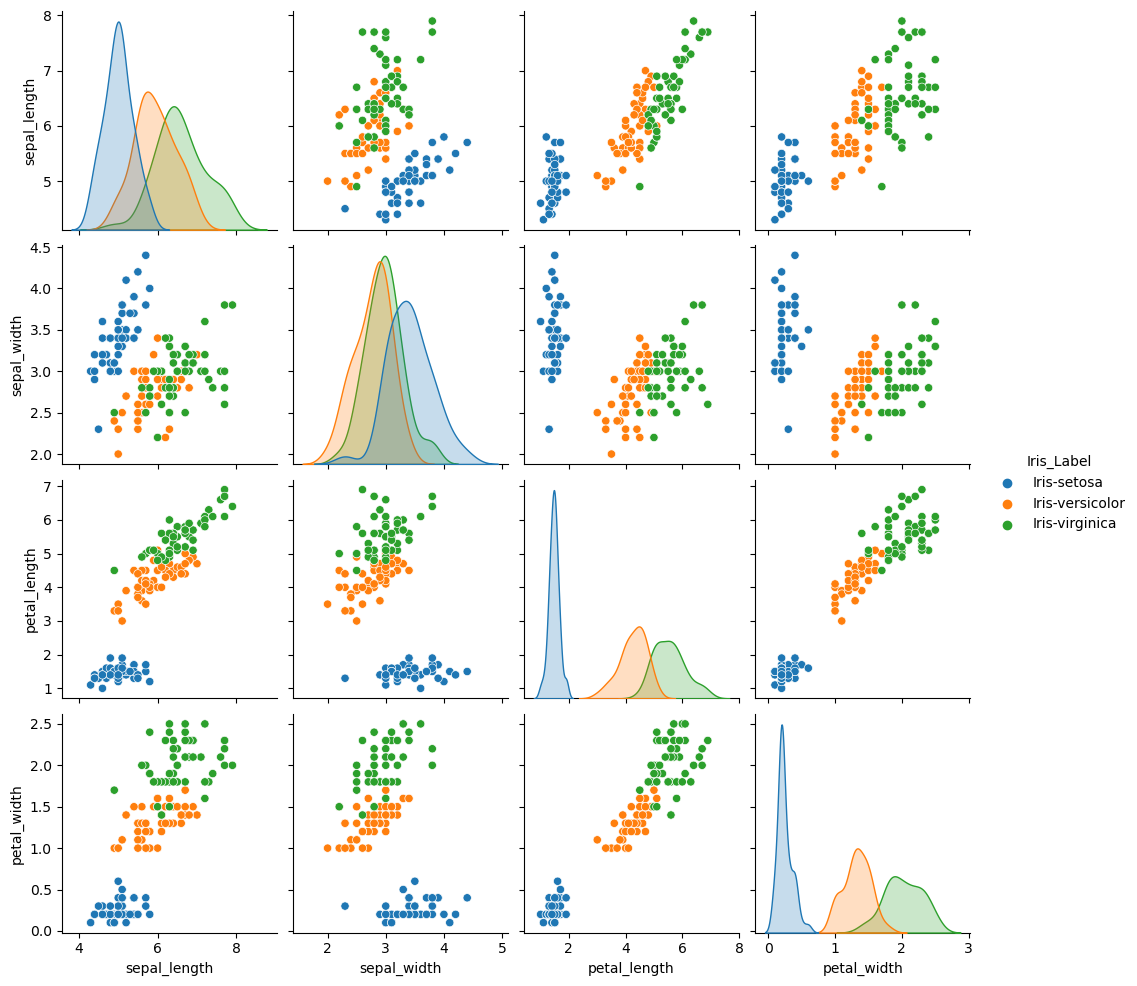

In [16]:
sns.pairplot(data,hue='Iris_Label')

# COOREALATION MATRIX

In [18]:
corr = data.corr()
corr

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.103784,0.871283,0.816971
sepal_width,-0.103784,1.000000,-0.415218,-0.350733
petal_length,0.871283,-0.415218,1.000000,0.962314
petal_width,0.816971,-0.350733,0.962314,1.000000


<AxesSubplot:>

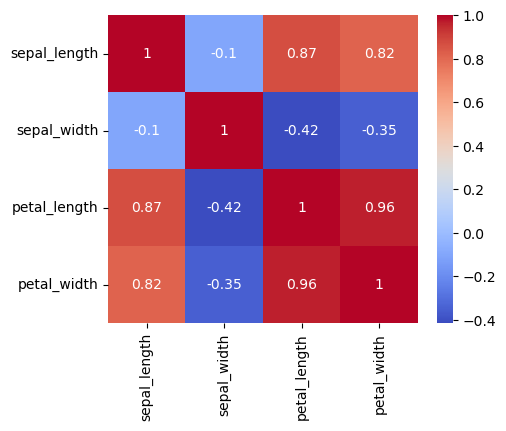

In [19]:
fig, ax = plt.subplots(figsize=(5,4))
sns.heatmap(corr, annot=True, ax=ax, cmap = 'coolwarm')

# LABEL ENCODER

In [20]:
from sklearn.preprocessing import LabelEncoder
Le = LabelEncoder()

In [21]:
data['Iris_Label'] = Le.fit_transform(data['Iris_Label'])
data.head()

,sepal_length,sepal_width,petal_length,petal_width,Iris_Label
0,4.9,3.0,1.4,0.2,0
1,4.7,3.2,1.3,0.2,0
2,4.6,3.1,1.5,0.2,0
3,5.0,3.6,1.4,0.2,0
4,5.4,3.9,1.7,0.4,0


# MODEL TRAINING

In [22]:
x = data.drop(columns = ['Iris_Label'])
y = data['Iris_Label']

In [23]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [24]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(119, 4)
(119,)
(30, 4)
(30,)


# LOGISTIC REGRESSION

In [25]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()

In [26]:
LR.fit(x_train,y_train)

LogisticRegression()

In [27]:
y_predict_train = LR.predict(x_train)
y_predict_train

array([0, 2, 2, 1, 0, 1, 0, 2, 1, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 0, 1, 1,
       1, 2, 0, 1, 1, 2, 1, 1, 1, 2, 2, 0, 2, 0, 1, 1, 1, 1, 2, 0, 0, 2,
       0, 0, 2, 0, 2, 0, 1, 2, 1, 2, 1, 1, 1, 0, 1, 2, 0, 1, 0, 0, 2, 0,
       1, 0, 1, 2, 1, 0, 2, 0, 2, 0, 2, 0, 2, 2, 0, 1, 1, 0, 1, 2, 2, 2,
       2, 0, 2, 1, 2, 2, 0, 1, 1, 1, 2, 2, 0, 2, 2, 1, 2, 1, 0, 0, 0, 0,
       2, 0, 0, 0, 2, 1, 0, 0, 0])

In [28]:
from sklearn.metrics import accuracy_score

In [29]:
print("Training Accuracy=",accuracy_score(y_train,y_predict_train)*100)

Training Accuracy= 98.31932773109243


In [30]:
y_predict_test = LR.predict(x_test)
print("Test Accuracy=",accuracy_score(y_predict_test,y_test)*100)


Test Accuracy= 96.66666666666667


# K NEAREST NEIGHBOR

In [31]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()

In [32]:
model.fit(x_train, y_train)

KNeighborsClassifier()

In [33]:
#print metric to get performance
print('Accuracy:', model.score(x_test, y_test)*100)

Accuracy: 96.66666666666667


# CLASSIFICATION REPORT

In [34]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict_test))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      0.92      0.96        13
           2       0.89      1.00      0.94         8

    accuracy                           0.97        30
   macro avg       0.96      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



# CONFUSION MATRIX

In [35]:
from sklearn.metrics import confusion_matrix

In [36]:
cm = confusion_matrix(y_predict_test,y_test)
print("Confusion Matrix :\n",cm)

Confusion Matrix :
 [[ 9  0  0]
 [ 0 12  0]
 [ 0  1  8]]


In [37]:
acc_score_train = accuracy_score(y_train,y_predict_train)
print("Accuracy Score for training data:",acc_score_train)

acc_score_test = accuracy_score(y_test,y_predict_test)
print("Accuracy Score for testing data:",acc_score_test)

Accuracy Score for training data: 0.9831932773109243
Accuracy Score for testing data: 0.9666666666666667


# Checking with new data

## I used LabelEncoder, 
### 0 - Iris-setosa
### 2 - Iris-virginica
### 1-  Iris-versicolo

In [38]:
import numpy as np
new_data = np.array([[2.5,4,1.3,6],[5.3,2.5,4.6,1.9],[4.9,2.2,3.8,1.1]])
prediction=LR.predict(new_data)
print("Prediction of Iris Flower:{}".format(prediction))

Prediction of Iris Flower:[0 2 1]
